In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from scipy import stats, integrate

from __future__ import division
from collections import defaultdict

In [267]:
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Visualization of distributions

### The following graphs showcases different ways to visualize the distributions and interactions of variables.

In [268]:
df = pd.read_csv('Datasets/flights.csv').drop('Unnamed: 0', 1).dropna().loc[500:1000,]
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
500,2013,1,1,1550.0,1550,0.0,1844.0,1831,13.0,9E,3372,N934XJ,JFK,IND,139.0,665,15,50,2013-01-01 15:00:00
501,2013,1,1,1552.0,1600,-8.0,1732.0,1720,12.0,EV,5709,N825AS,LGA,IAD,55.0,229,16,0,2013-01-01 16:00:00
502,2013,1,1,1552.0,1600,-8.0,1826.0,1820,6.0,FL,620,N997AT,LGA,ATL,132.0,762,16,0,2013-01-01 16:00:00
503,2013,1,1,1552.0,1600,-8.0,1749.0,1757,-8.0,9E,3459,N910XJ,JFK,BNA,150.0,765,16,0,2013-01-01 16:00:00
504,2013,1,1,1552.0,1600,-8.0,1933.0,1915,18.0,AA,565,N3CGAA,JFK,DFW,254.0,1391,16,0,2013-01-01 16:00:00


### The displot shows the distribution of a single varialbe of the data.

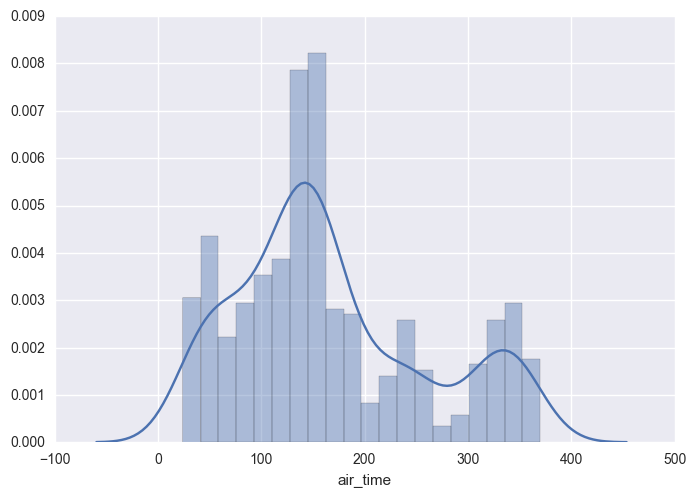

In [269]:
sns.distplot(df['air_time'], bins = 20)
plt.show()

### The variable, medv, fitted against a gamma distribution.

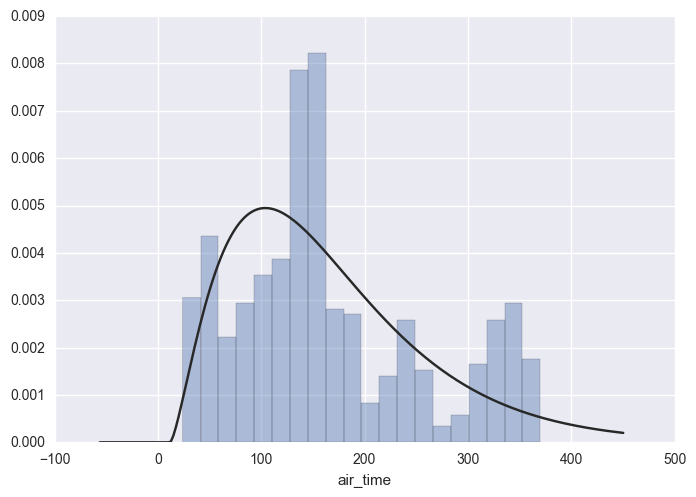

In [270]:
sns.distplot(df['air_time'], kde = False, fit = stats.gamma, bins = 20)
plt.show()

### Visualizing correlations between variables

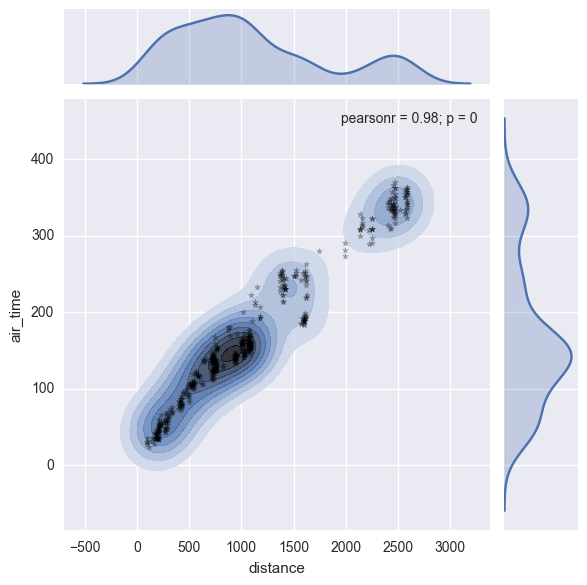

In [271]:
g = sns.jointplot(df['distance'], df['air_time'], kind = 'kde', alpha = 0.8)
g.plot_joint(plt.scatter, c = 'k', marker = '*', alpha = '0.3')
g.ax_joint.collections[0].set_alpha(0)
plt.show()

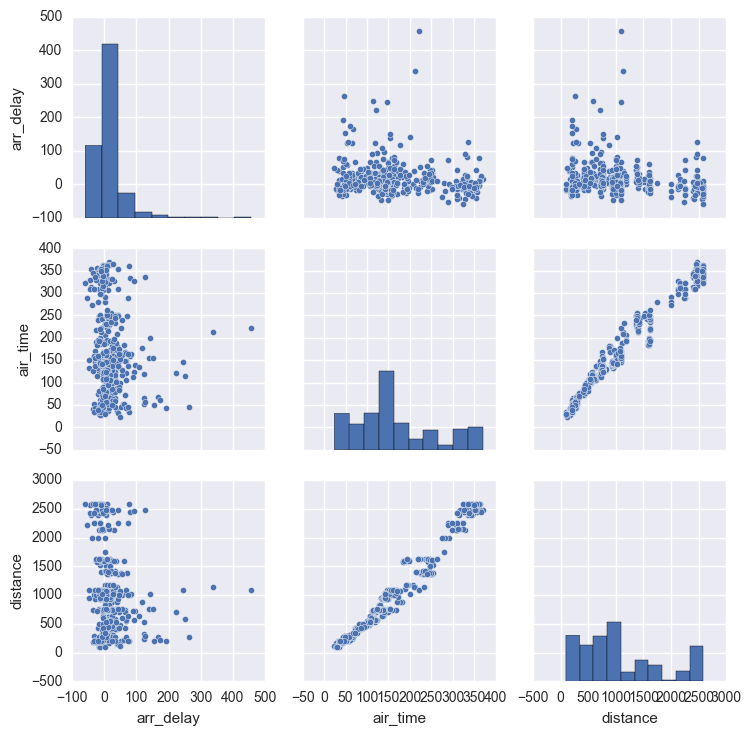

In [272]:
sns.pairplot(df[['arr_delay', 'air_time', 'distance']])
plt.show()

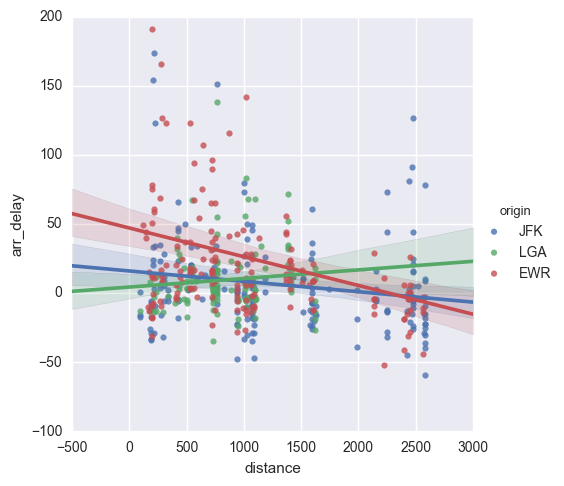

In [273]:
sns.lmplot(data = df, x = 'distance', y = 'arr_delay' , hue = 'origin')
plt.ylim(-100, 200)
plt.show()

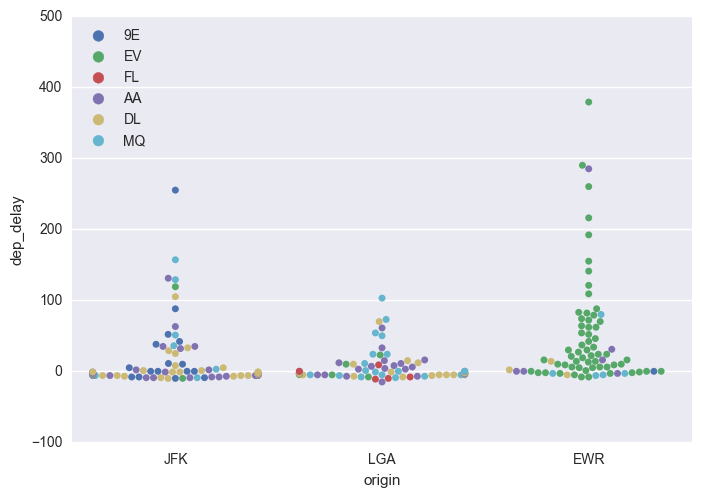

In [274]:
temp = df[df['carrier'].isin(df['carrier'].unique()[0:6])]
sns.swarmplot(data = temp, x = 'origin', y = 'dep_delay', hue = 'carrier')
plt.legend(loc = 2)
plt.show()

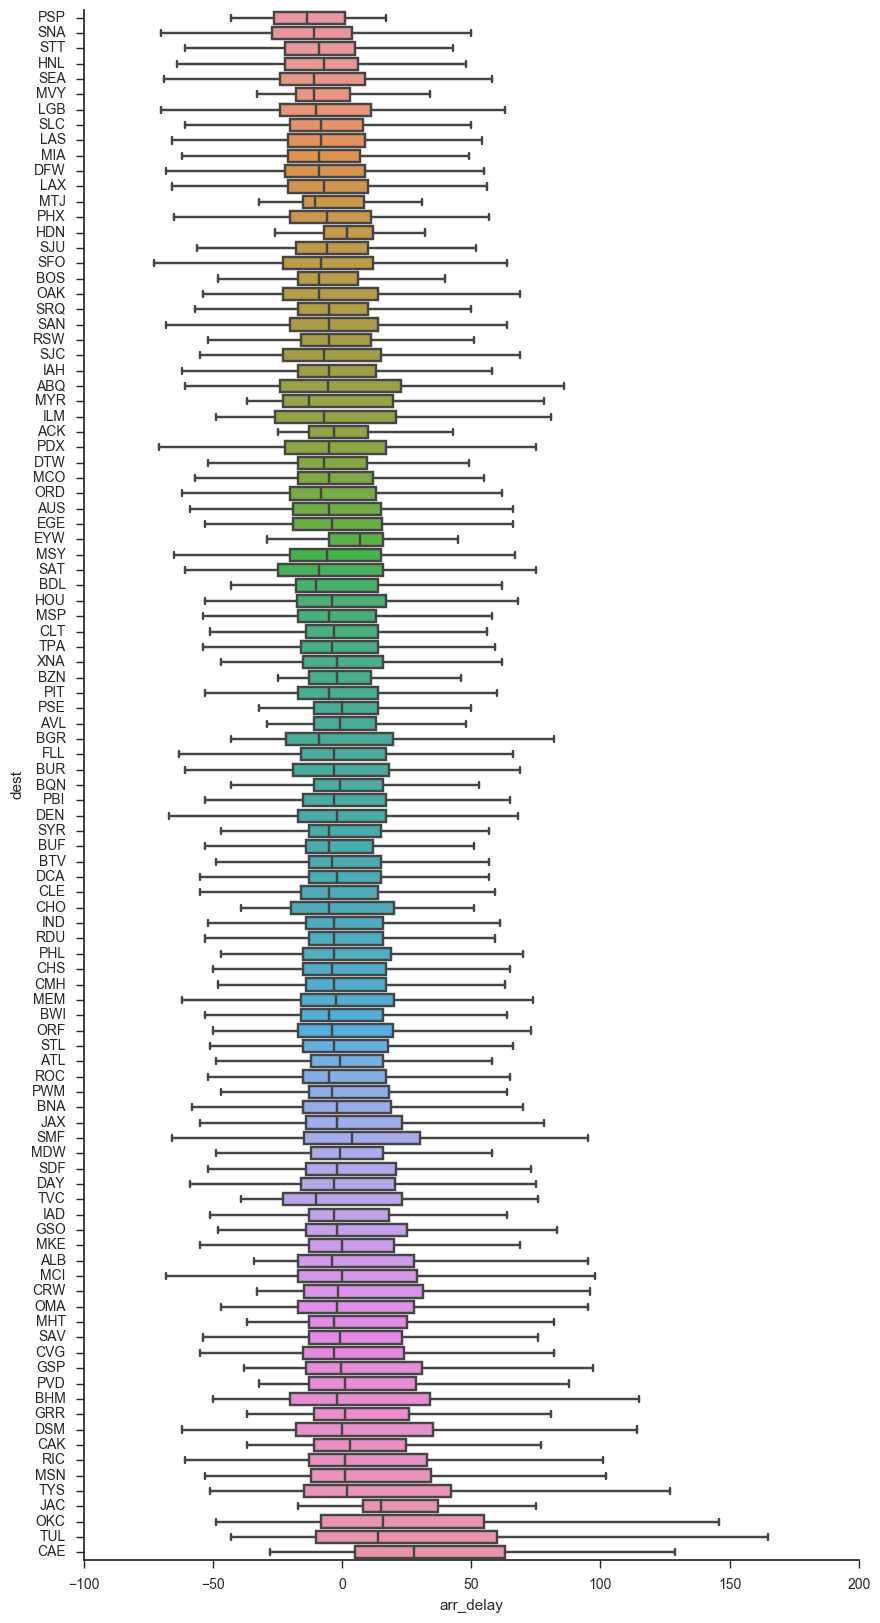

In [275]:
def OrderName(df, order_col, order_on):
    ordr = [] #median
    nme = [] #name
    for name in (np.unique(df[order_col])):
        nme.append(name)
        ordr.append(np.mean(df[df[order_col] == name][order_on].dropna()))
    order = list(pd.DataFrame([nme,ordr]).T.sort_values(by = 1)[0])
    return(order)

def TopDest(df, col_name):
    dest_list = []
    for dest in df[col_name].unique():
        if len(df[df[col_name] == dest])>10:
            dest_list.append(dest)
    return dest_list
            
    
df = pd.read_csv('Datasets/flights.csv').drop('Unnamed: 0', 1).dropna()
dest_df = df[df['dest'].isin(TopDest(df, 'dest'))]

with sns.axes_style("ticks"):
    pylab.rcParams['figure.figsize'] = (10., 20.)
    sns.boxplot(data = dest_df , x = 'arr_delay', y = 'dest', order = OrderName(dest_df, 'dest', 'arr_delay'), showfliers=False)
    sns.despine()
    plt.show()
pylab.rcParams['figure.figsize'] = (6.0, 4.0)

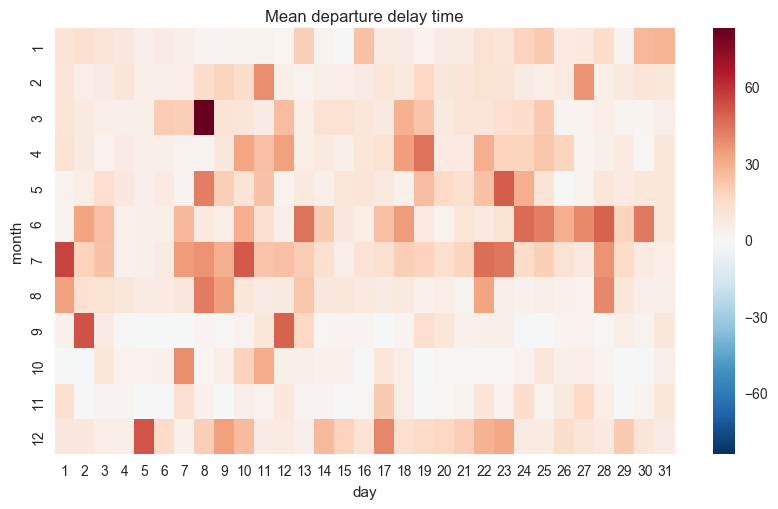

In [278]:
pylab.rcParams['figure.figsize'] = (10.,5.5)
heat_df = pd.pivot_table(df, index = "month", columns = "day", values = 'dep_delay', aggfunc = np.mean)
heat_df = heat_df.fillna(heat_df.mean())
sns.heatmap(data = heat_df)
plt.title('Mean departure delay time')
plt.show()
pylab.rcParams['figure.figsize'] = (6.,4.)

In [298]:
# sns.tsplot(data = df, time = 'month', value = 'dep_delay', condition = 'origin', unit = 'day')
# plt.show()